In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, RepeatVector
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
import cv2
import matplotlib.pyplot as pt
#https://www.kaggle.com/datasets/adityajn105/flickr8k

In [ ]:
#code to load full dataset 
# def load_data(image_folder, caption_file):
#     image_paths, captions = [], []
#     imgs = []
#     with open(caption_file, 'r') as f:
#         for line in f:
#             line = line.strip().split(',')  # Assuming tab-separated file, adjust if comma
#             image_name, caption = line[0], line[1]
#             image_paths.append(os.path.join(image_folder, image_name))
#             captions.append(caption)
#             img = cv2.imread(os.path.join(image_folder, image_name))
#             imgs.append(img)
#     return imgs, image_paths, captions
# image_folder = r'C:\Users\HP\Documents\5th SEM\Project\Image_Caption\Dataset\Images'  # Folder containing images
# caption_file = r"C:\Users\HP\Documents\5th SEM\Project\Image_Caption\Dataset\captions.txt" # Text file with image-caption pairs
# imgs, image_paths, captions = load_data(image_folder, caption_file)

In [22]:
import os

def load_data(image_folder, caption_file, limit=20):
    imgs, image_paths, captions = [], [], []
    unique_images = set()  # Track unique images to respect the limit

    # Load captions from the file
    with open(caption_file, 'r') as file:
        lines = file.readlines()
        
    # Loop over each line to process only up to the limit of unique images
    for line in lines:
        img_name, caption = line.strip().split(',', 1)  # Split on first comma only
        img_path = os.path.join(image_folder, img_name)

        # Check if we have already reached the limit of unique images
        if len(unique_images) >= limit:
            break

        # Only add images and captions if the image is new and exists in the folder
        if img_name not in unique_images and os.path.exists(img_path):
            unique_images.add(img_name)
            imgs.append(img_name)
            image_paths.append(img_path)
            captions.append(caption)

    return imgs, image_paths, captions

# Folder containing images
image_folder = r"C:\Users\muni karthik\Desktop\SEM7\DLCA\MODEL ANS\Images"
# Text file with image-caption pairs
caption_file = r"C:\Users\muni karthik\Desktop\SEM7\DLCA\MODEL ANS\captions.txt"

# Load only 20 unique images and their captions
imgs, image_paths, captions = load_data(image_folder, caption_file, limit=500)


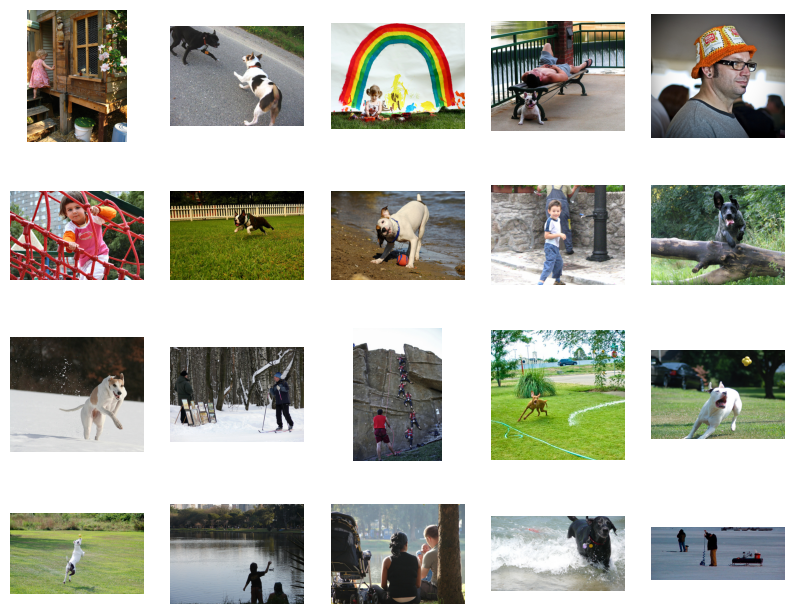

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images(image_paths, limit=20):
    plt.figure(figsize=(10, 10))
    
    # Display only the first 'limit' images
    for i in range(min(limit, len(image_paths))):
        # Open each image and convert to a format plt.imshow can handle
        image = Image.open(image_paths[i])
        
        # Plot the image
        plt.subplot(5, 5, i + 1)  # Arrange images in a 5x5 grid
        plt.imshow(image)
        plt.axis('off')
        
    plt.show()

# Display up to 20 images
display_images(image_paths)


In [10]:
image_paths = image_paths[1:12]

In [11]:
captions = captions[1:12]

In [12]:
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
cnn_model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)

In [13]:
import matplotlib.pyplot as plt

def extract_features(image):
    image = np.expand_dims(image, axis=0)  # Expand dims to simulate batch
    return cnn_model.predict(image)

In [14]:
def build_captioning_model(vocab_size, max_caption_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_caption_length))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [ ]:
vocab_size = 1000           # Dummy vocab size for captions
max_caption_length = 10      # Max length of captions

# Build and summarize the model
captioning_model = build_captioning_model(vocab_size, max_caption_length)
captioning_model.summary()

# Dummy data for demonstration
image = np.random.rand(224, 224, 3)  # Dummy image data
caption = np.random.randint(1, vocab_size, (1, max_caption_length))

In [16]:
image_features = extract_features(image)
print("Extracted Image Features:", image_features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Extracted Image Features: (1, 7, 7, 512)


In [17]:
captioning_model.fit(caption, np.random.rand(1, max_caption_length, vocab_size), epochs=10,verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3465.4429
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3465.3945
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3465.3481
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3465.3054
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3465.2710
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3465.2539
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3465.2781
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3465.4102
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3465.8335
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3467.0117


In [18]:
reference_captions = [
    ["a", "sample", "caption", "of", "an", "image"],
    ["another", "description", "of", "the", "image", "content"]
]

In [ ]:
!pip install nltk

In [20]:
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu(reference, candidate):
    reference = [reference]  # NLTK BLEU expects list of references
    return sentence_bleu(reference, candidate)

In [ ]:
dummy_generated_caption = ["this", "is", "a", "generated", "caption"]
bleu_score = evaluate_bleu(reference_captions[0], dummy_generated_caption)
print("BLEU score for the generated caption:", bleu_score)